In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pathlib
import sys
from os.path import join
path_to_file = str(pathlib.Path().resolve())
dir_path = join(path_to_file, "../../")
sys.path.append(join(dir_path, "HelperFiles"))
import helper

def get_fwers_all_pts(all_top_Ks):
    return np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in all_top_Ks])



In [2]:
# alpha = 0.1
# results_path = join(dir_path, "Experiments", "Results", "Top_K", "rank", "alpha_"+str(alpha))

# with open(join(results_path, "rankshap_vs_ss_k2"), "rb") as fp:
#     results2 = pickle.load(fp)
# results2.keys()

# with open(join(results_path, "rankshap_vs_ss_k5"), "rb") as fp:
#     results5 = pickle.load(fp)
# print(results5.keys())


# rankshap_fwers2 = get_fwers_all_pts(results2['rankshap'])
# ss_adaptive_fwers2 = get_fwers_all_pts(results2['ss_adaptive'])
# rankshap_fwers5 = get_fwers_all_pts(results5['rankshap'])
# ss_adaptive_fwers5 = get_fwers_all_pts(results5['ss_adaptive'])

In [3]:
# import matplotlib.pyplot as plt

# # Simulated data for the plot based on previous assumptions
# data = {
#     "RankSHAP (K=2)": rankshap_fwers2,
#     "SS Adaptive (K=2)": ss_adaptive_fwers2,
#     "RankSHAP (K=5)": rankshap_fwers5,
#     "SS Adaptive (K=5)": ss_adaptive_fwers5
# }

# fig, ax = plt.subplots(figsize=(12, 4))

# # Plotting each group on the same axes
# positions = [0.5, 1.25, 2.5, 3.25]  # Space between K=2 and K=5 boxplots for clarity
# box = ax.boxplot(data.values(), positions=positions, widths=0.6, patch_artist=True, vert=False, showfliers=True)

# # Adding colors to distinguish between methods
# colors = ['#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e']
# for patch, color in zip(box['boxes'], colors):
#     patch.set_facecolor(color)

# # Customizing plot details
# ax.set_title('FWERs of Top-K SHAP Rankings', fontsize=24)
# ax.set_xlabel('FWER', fontsize=20)
# ax.set_xlim(0, .25)
# ax.set_ylim(0, np.max(positions)+.5)  # Assuming FWER scales similar to previous plots
# ax.set_yticks([np.mean(positions[:2]), np.mean(positions[2:])])
# ax.set_yticklabels(['K = 2', 'K = 5'], fontsize=18)
# ax.tick_params(axis='x', labelsize=15)

# # Adding a legend manually
# from matplotlib.patches import Patch
# legend_elements = [
#     Patch(facecolor='#ff7f0e', label='Shapley Sampling'),
#     Patch(facecolor='#1f77b4', label='RankSHAP')
# ]
# ax.legend(handles=legend_elements, loc='upper right', fontsize=18)

# plt.tight_layout()
# plt.savefig(join(dir_path, "Experiments", "Figures", "rankshap_vs_ss.pdf"), bbox_inches="tight", format="pdf")
# plt.show()

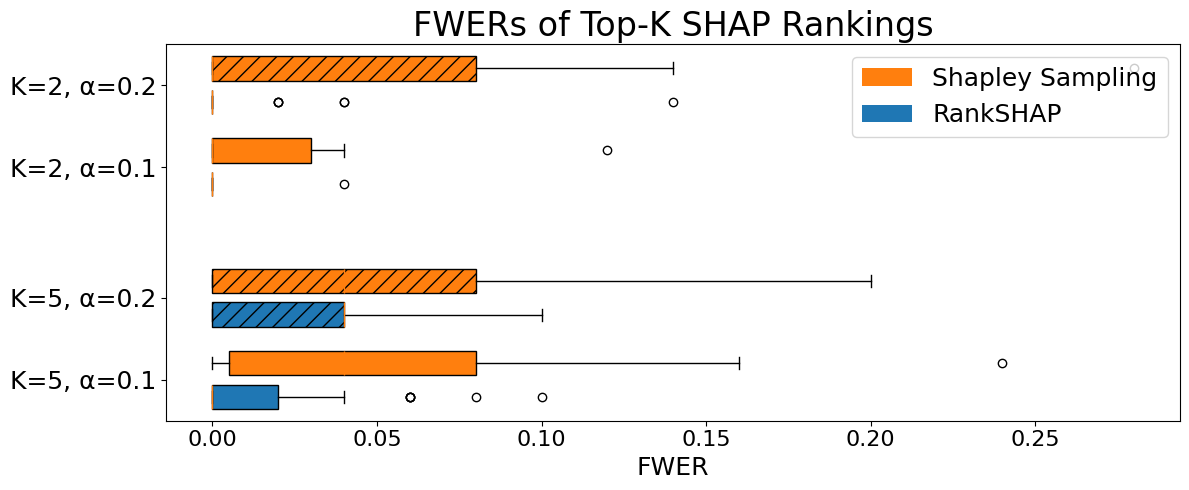

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pathlib
import sys
from os.path import join

# Environment setup
path_to_file = str(pathlib.Path().resolve())
dir_path = join(path_to_file, "../../")
sys.path.append(join(dir_path, "HelperFiles"))
import helper

# Load and prepare data for alpha = 0.1
alpha = 0.1
results_path = join(dir_path, "Experiments", "Results", "Top_K", "rank", "alpha_"+str(alpha))
with open(join(results_path, "rankshap_vs_ss_k2"), "rb") as fp:
    results2_alpha01 = pickle.load(fp)
with open(join(results_path, "rankshap_vs_ss_k5"), "rb") as fp:
    results5_alpha01 = pickle.load(fp)
rankshap_fwers2_alpha01 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results2_alpha01['rankshap']])
ss_adaptive_fwers2_alpha01 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results2_alpha01['ss_adaptive']])
rankshap_fwers5_alpha01 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results5_alpha01['rankshap']])
ss_adaptive_fwers5_alpha01 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results5_alpha01['ss_adaptive']])

# Load and prepare data for alpha = 0.2
alpha = 0.2
results_path = join(dir_path, "Experiments", "Results", "Top_K", "rank", "alpha_"+str(alpha))
with open(join(results_path, "rankshap_vs_ss_k2"), "rb") as fp:
    results2_alpha02 = pickle.load(fp)
with open(join(results_path, "rankshap_vs_ss_k5"), "rb") as fp:
    results5_alpha02 = pickle.load(fp)
rankshap_fwers2_alpha02 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results2_alpha02['rankshap']])
ss_adaptive_fwers2_alpha02 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results2_alpha02['ss_adaptive']])
rankshap_fwers5_alpha02 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results5_alpha02['rankshap']])
ss_adaptive_fwers5_alpha02 = np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in results5_alpha02['ss_adaptive']])

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Assuming 'data' is structured to have each method's results per K and alpha next to each other
# Adjust 'data' dictionary as needed to match this ordering:
data = {
    "RankSHAP (K=5, α=0.1)": rankshap_fwers5_alpha01,
    "SS Adaptive (K=5, α=0.1)": ss_adaptive_fwers5_alpha01,
    "RankSHAP (K=5, α=0.2)": rankshap_fwers5_alpha02,
    "SS Adaptive (K=5, α=0.2)": ss_adaptive_fwers5_alpha02,
        "RankSHAP (K=2, α=0.1)": rankshap_fwers2_alpha01,
    "SS Adaptive (K=2, α=0.1)": ss_adaptive_fwers2_alpha01,
    "RankSHAP (K=2, α=0.2)": rankshap_fwers2_alpha02,
    "SS Adaptive (K=2, α=0.2)": ss_adaptive_fwers2_alpha02
}

fig, ax = plt.subplots(figsize=(12, 5))
# Adjusting positions to accommodate even wider box plots
# positions = [1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5]
# positions = [1, 1.6, 2.5, 3.1, 4.5, 5.1, 6.2, 7.0]
btwn_alphas = 1
btwn_Ks = 2
btwn_same = 0.7
start = 1
mid = start+btwn_alphas+btwn_same*2 + btwn_Ks
positions = [start, start+btwn_same, start+btwn_alphas+btwn_same, start+btwn_alphas+btwn_same*2, 
             mid, mid+btwn_same, mid+btwn_alphas+btwn_same, mid+btwn_alphas+btwn_same*2, ]

# Doubling the width of each box plot as requested
box = ax.boxplot(list(data.values()), positions=positions, widths=0.5, patch_artist=True, vert=False, showfliers=True)

colors = ['#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e']
hatches = [None, None, '//', '//', None, None, '//', '//']
for patch, color, hatch in zip(box['boxes'], colors, hatches):
    patch.set_facecolor(color)
    patch.set_hatch(hatch)

ax.set_title('FWERs of Top-K SHAP Rankings', fontsize=24)
ax.set_xlabel('FWER', fontsize=18)
# ax.set_ylabel('Methods and K Values', fontsize=18)
# Set y-ticks to group RankSHAP and SS Adaptive together
ax.set_yticks([np.mean([positions[i], positions[i+1]]) for i in range(0, len(positions), 2)])
ax.set_yticklabels(['K=5, α=0.1', 'K=5, α=0.2', 'K=2, α=0.1', 'K=2, α=0.2'], fontsize=18)

# Update legend to include method colors and alpha distinctions
legend_elements = [
    Patch(facecolor='#ff7f0e', label='Shapley Sampling'),
    Patch(facecolor='#1f77b4', label='RankSHAP')
    # Patch(facecolor='white', edgecolor='black', label='α=0.1'),
    # Patch(facecolor='white', edgecolor='black', hatch='//', label='α=0.2')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=18)
ax.tick_params(axis='x', labelsize=16)
plt.tight_layout()
plt.savefig(join(dir_path, "Experiments", "Figures", "rankshap_vs_ss.pdf"), bbox_inches="tight", format="pdf")
plt.show()